In [118]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [121]:
## Checking Missing Values.
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [122]:
## Checking Duplicates Values.
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4516,False
4517,False
4518,False
4519,False


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [124]:
## Removing Irrelevant Columns.
df = df.drop('duration', axis=1)
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no


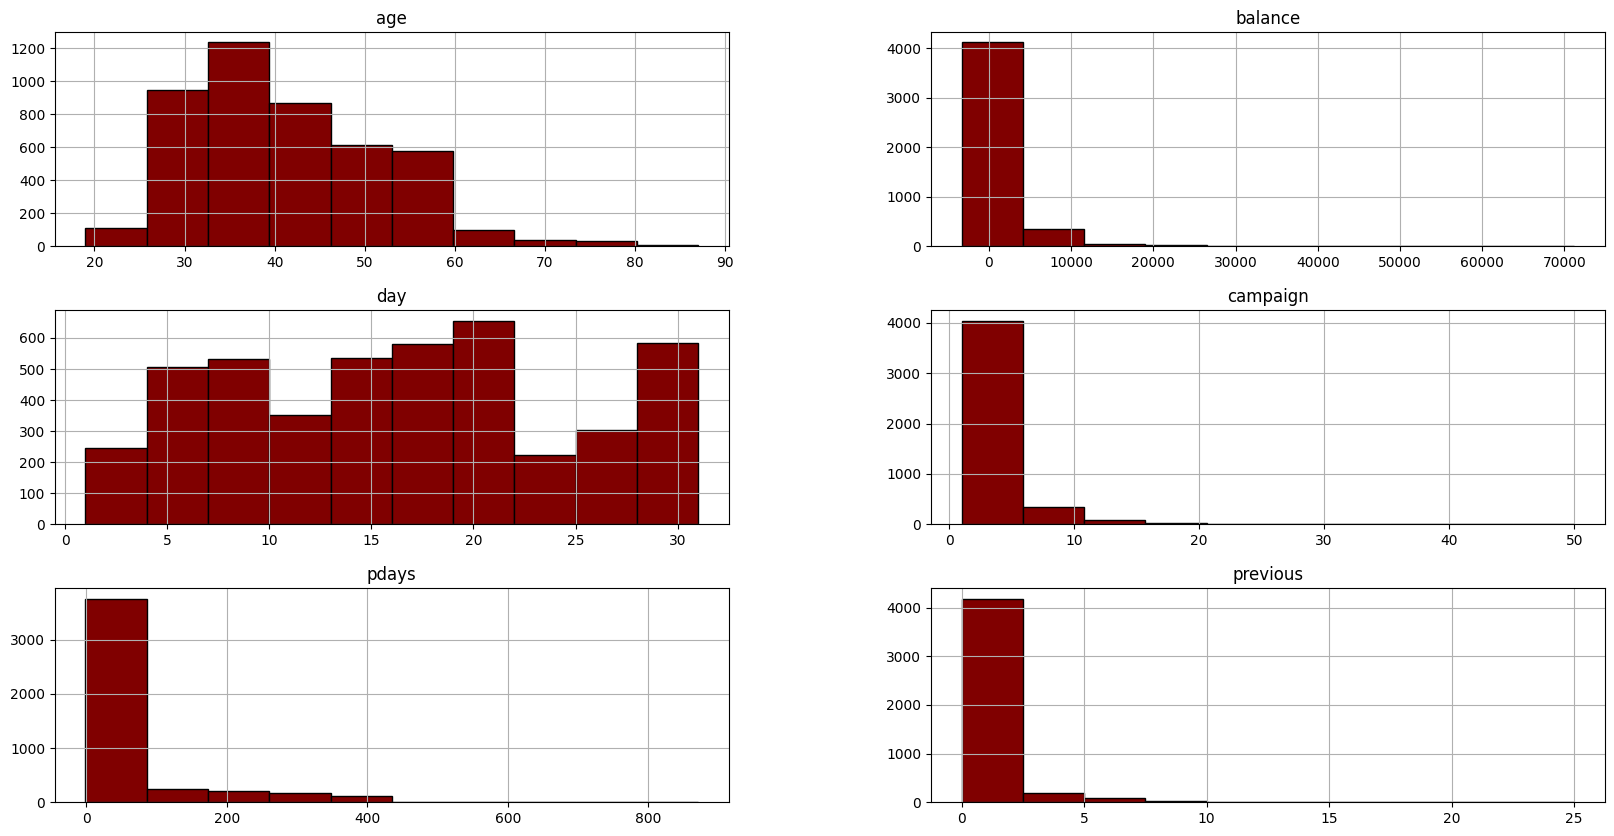

In [128]:
df.hist(figsize=(20,10), color='maroon', edgecolor='BLACK')
plt.show()

In [80]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')


In [81]:
## Splitting Train and Test data.
X = df.drop('y', axis=1)
y = df['y'].map({'yes' : 1, 'no' : 0})

In [82]:
## Identifying Catgorical Columns.
categorical_obj = X.select_dtypes(include=['object']).columns

In [83]:
## Encode Categorical Coulumns.
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = encoder.fit_transform(X[categorical_obj])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_obj), index=X.index)

X_final = pd.concat([X.drop(columns=categorical_obj), encoded_df], axis=1)

In [117]:
print('X DATA SHAPE : ',X_final.shape)
print('Y DATA SHAPE :',y.shape)

X DATA SHAPE :  (4521, 41)
Y DATA SHAPE : (4521,)


In [86]:
## Train Test Split.
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

In [116]:
print('X TRAIN SHAPE : ',X_train.shape)
print('Y TRAIN SHAPE : ',y_train.shape)
print('X TEST SHAPE : ',X_test.shape)
print('Y TEST SHAPE : ',y_test.shape)

X TRAIN SHAPE :  (3164, 41)
Y TRAIN SHAPE :  (3164,)
X TEST SHAPE :  (1357, 41)
Y TEST SHAPE :  (1357,)


In [98]:
## Training Decision Tree Classifier.
clf = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=10, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [99]:
## Prediction on Test Data.
y_pred = clf.predict(X_test)

In [100]:
## Evaluatation of the Model.
print('--------------------------------------')
print("ACCURACY SCORE : ",accuracy_score(y_test, y_pred))
print('--------------------------------------')
print('CLASSIFICATION REPORT :- \n--------------------------------------\n',classification_report(y_test, y_pred))

--------------------------------------
ACCURACY SCORE :  0.89240972733972
--------------------------------------
CLASSIFICATION REPORT :- 
--------------------------------------
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1205
           1       0.57      0.16      0.26       152

    accuracy                           0.89      1357
   macro avg       0.74      0.57      0.60      1357
weighted avg       0.87      0.89      0.87      1357



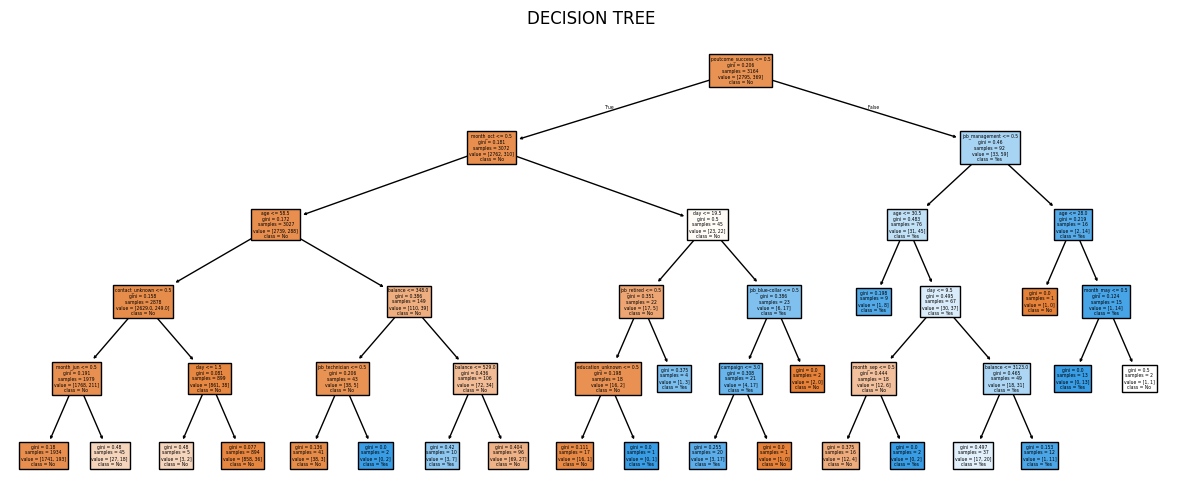

In [106]:
## Decision Tree Graph for better understanding.
plt.figure(figsize=(15,6))
tree.plot_tree(clf, filled=True, feature_names=X_final.columns, class_names=['No', 'Yes'])
plt.title('DECISION TREE')
plt.show()

In [107]:
importances = clf.feature_importances_
features = X_final.columns
indices = importances.argsort()[::-1]

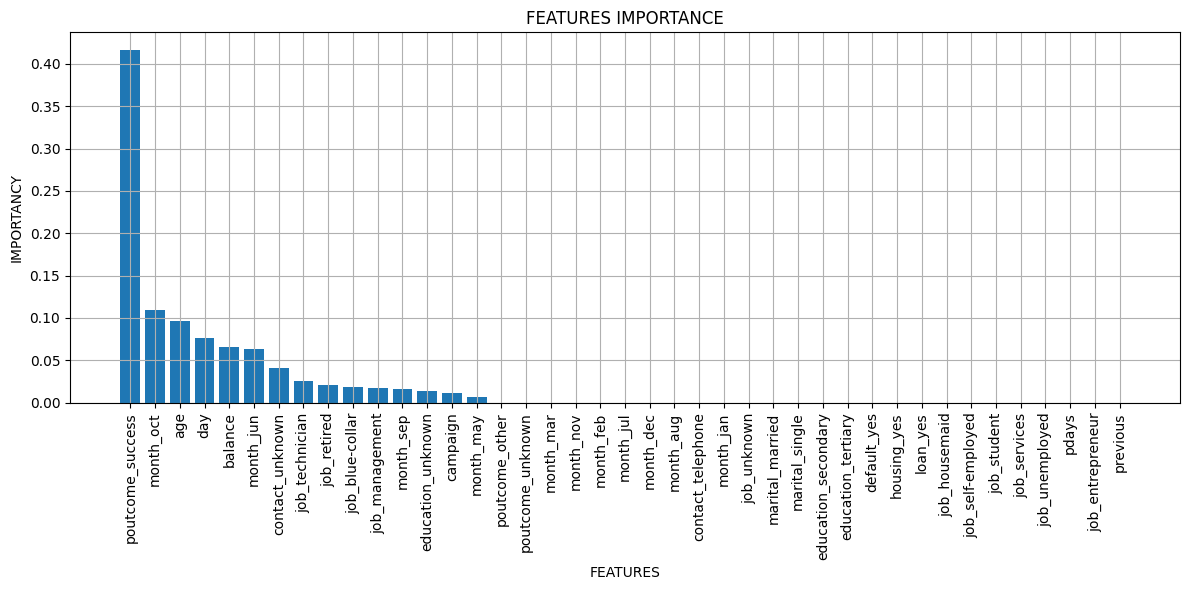

In [131]:
## Visualizing Important Features through Bar Graph.
plt.figure(figsize=(12,6))
plt.title('FEATURES IMPORTANCE')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.xlabel('FEATURES')
plt.ylabel('IMPORTANCY')
plt.grid()
plt.tight_layout()
plt.show()

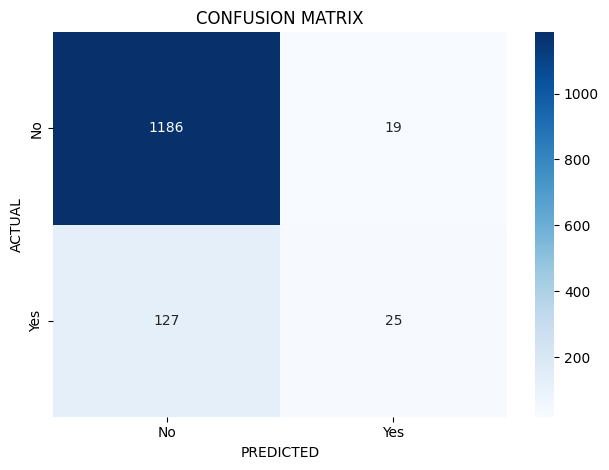

In [132]:
## Confusion Matrix.
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('CONFUSION MATRIX')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.tight_layout()
plt.show()